In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("kc_housingdata.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data_num=data[['price','bedrooms','bathrooms','sqft_living']]
data_num.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [8]:
#scale the data using pandas
#Z scaling
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)

In [9]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [10]:
#Another method
import sklearn.preprocessing as preprocessing
data_scaled=preprocessing.scale(data_num,axis=0)

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
print(data_scaled)
print("Type of output is:"+str(type(data_scaled)))
print("shape of object is:"+str(data_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
Type of output is:<class 'numpy.ndarray'>
shape of object is:(21613, 4)


In [12]:
#create a cluster model
import sklearn.cluster as cluster

In [13]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(data_scaled)

In [14]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [15]:
kmeans.cluster_centers_

array([[-0.03208054,  0.35849295,  0.3722573 ,  0.22927597],
       [-0.46431433, -0.72522563, -0.86371106, -0.79095081],
       [ 1.9043427 ,  1.0854251 ,  1.54554015,  1.93138623]])

In [16]:
##Elbow method
from scipy.spatial.distance import cdist
K=range(1,20)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_scaled)
    wss.append(sum(np.min(cdist(data_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/data_scaled.shape[0])

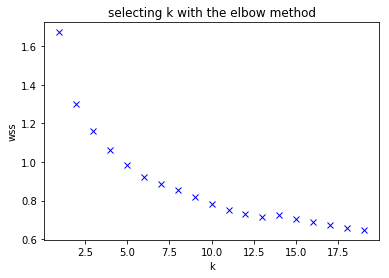

In [17]:
plt.plot(K,wss,'bx')
plt.xlabel("k")
plt.ylabel("wss")
plt.title("selecting k with the elbow method")
plt.show()

In [18]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(data_scaled).labels_

In [19]:
metrics.silhouette_score(data_scaled,labels,metric="euclidean",sample_size=10000,random_state=200)

0.28313345009707275

In [20]:
#find silhoutte score for cluster models with 7 to 13 clusters


for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(data_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.2763712840436325
Silhoutte score for k= 8 is 0.2903953376334379
Silhoutte score for k= 9 is 0.28508536235309107
Silhoutte score for k= 10 is 0.2806069718200512
Silhoutte score for k= 11 is 0.27578365881372385
Silhoutte score for k= 12 is 0.28154010556603204


In [21]:
#for above score is max for k=8
import cluster_profiles as cluster_profiles

ModuleNotFoundError: No module named 'cluster_profiles'

In [22]:
## Let's look for profiles for 8,9,10 clusters
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(data_scaled)

In [23]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

NameError: name 'cluster_profiles' is not defined